In [70]:
import pandas as pd
import gzip
import matplotlib as plt

# Data

In [9]:
reviews_df = pd.read_csv('reviews.csv.gz', compression='gzip')

In [11]:
listings_df = pd.read_csv('listings.csv.gz', compression='gzip')

In [ ]:
full_listings = listings_sum_df.astype(object).merge(listings, 'right')

The data consists of 2 dataframes
* reviews_df
* listings_df

**reviews_df** consists of reviews written by users. It contains the following columns.

In [12]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,29967,62788,2010-07-09,151260,Debbie,When I booked our stay in San Diego at Dennis ...
1,29967,64568,2010-07-14,141552,Eric,This was my first experience with using airbnb...
2,29967,67502,2010-07-22,141591,David,We found the house to be very accommodating--e...
3,29967,70466,2010-07-29,125982,Anders,As advertised and more. Dennis was very helpfu...
4,29967,74876,2010-08-07,29835,Miyoko,We had a great time in San Diego. Denis' house...


Column data descriptions
* listing_id: A unique ID for the associated AirBnB listing
* id: A unique ID for the review
* reviwer_id: A unique ID for the reviewer
* reviwer_name: Name of the reviewer
* comments: The review itself in text

Here are the data types of the columns

In [114]:
reviews_df.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

**listings_df** consists of individual listings on AirBnB

In [119]:
listings_df.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5570,https://www.airbnb.com/rooms/5570,20201025051130,2020-10-25,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,While some may compare San Diego’s Mission Bea...,https://a0.muscache.com/pictures/d3342744-140a...,8435,https://www.airbnb.com/users/show/8435,...,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN
1,29967,https://www.airbnb.com/rooms/29967,20201025051130,2020-10-25,"Great home, 10 min walk to Beach","This 2 bedroom, 2 full bathroom home offers al...",NaN,https://a0.muscache.com/pictures/76103867/c9b5...,129123,https://www.airbnb.com/users/show/129123,...,10.0,10.0,10.0,NaN,f,5,5,0,0,0.49
2,38245,https://www.airbnb.com/rooms/38245,20201025051130,2020-10-25,Point Loma: Den downstairs,Stay in a 1928 Spanish Style home. Den is dow...,"This neighborhood is an expensive, high-end Po...",https://a0.muscache.com/pictures/f3073822-e493...,164137,https://www.airbnb.com/users/show/164137,...,10.0,9.0,9.0,NaN,f,3,0,3,0,1.16


listings_df contains a multitude of columns. They can be summarized by grouping the columns based on the type of data they represent. 
* Listing details: name, description, neighbourhood, price...
* Listing requirements: minimum and maximum stay duration, availability...
* Listing physical details: bathrooms, bedrooms, property type...
* Listing ratings: scores based on location, cleanliness, communication...
* Host details: Reponse rate, name, location, acceptance/response rate...
* Host stats: counts of listing types

In [129]:
#Statistics generated for various numeric columns: price, #bedrooms, #beds
listings_df[['bedrooms', 'beds', 'amenities', 'price', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']].describe()

,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7771.000000,8649.000000,8688.000000,7417.000000,7382.000000,7383.000000,7381.000000,7382.000000,7381.000000,7381.000000,8688.000000,8688.000000,8688.000000,8688.000000,7462.000000
mean,1.919959,2.541334,233.453384,94.969395,9.672988,9.566978,9.813304,9.788946,9.811814,9.440049,16.821593,16.179903,0.574010,0.051335,1.995997
std,1.213831,2.000910,377.850912,7.370548,0.763497,0.768930,0.638928,0.653814,0.583839,0.850532,34.293624,34.503473,1.558144,0.480673,1.975621
min,1.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.000000,1.000000,93.000000,93.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.430000
50%,2.000000,2.000000,145.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000,2.000000,0.000000,0.000000,1.340000
75%,2.000000,3.000000,254.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,13.000000,12.000000,0.000000,0.000000,3.000000
max,12.000000,22.000000,10000.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,165.000000,165.000000,14.000000,8.000000,21.950000


## Remove Useless Columns

Take out useless columns from listings
* picture_url
* scrape_id
* last_scraped
* host_url
* host_thumbnail_url
* host_picture_url
* license
* calendar_last_scraped
* host_verifications
* neighbourhood_group_cleansed

In [83]:
listings_useful_columns = [
        'id', 'listing_url', 'name', 'description',
       'neighborhood_overview', 'host_id',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']

In [84]:
#We're gonna start off with 65 columns
len(listings_useful_columns)

65

# EDA

## Plot data and get distributions

### Range of review dates

Get a sense for the span of time that the data covers

### Reviews per listing ID

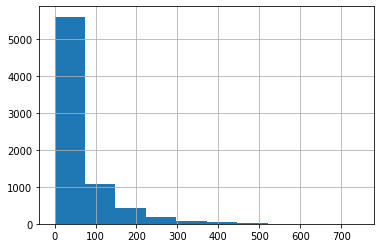

In [101]:
reviews_df.groupby('listing_id')['comments'].count().hist();

### Verified users vs unverified

### Listing Neighbourhoods

In [39]:
listings_df['neighbourhood_cleansed'].value_counts()[:20]

Mission Bay                1396
Pacific Beach               704
La Jolla                    628
East Village                513
Ocean Beach                 423
Midtown                     394
North Hills                 380
Loma Portal                 201
Balboa Park                 188
Little Italy                186
West University Heights     167
Gaslamp Quarter             165
Old Town                    151
Park West                   147
University City             140
Bay Park                    137
Mira Mesa                   135
Grant Hill                  132
Clairemont Mesa             114
Carmel Valley               112
Name: neighbourhood_cleansed, dtype: int64

### Listing Room Types

In [41]:
listings_df['room_type'].value_counts()

Entire home/apt    6913
Private room       1676
Shared room          75
Hotel room           24
Name: room_type, dtype: int64

In [53]:
listings_df['property_type'].value_counts()[:20]

Entire house                   1987
Entire apartment               1797
Entire condominium             1275
Private room in house           896
Entire guesthouse               391
Entire guest suite              321
Entire townhouse                313
Entire cottage                  240
Private room in apartment       213
Entire loft                     172
Private room in condominium     165
Entire bungalow                 149
Private room in townhouse       122
Entire serviced apartment       104
Entire villa                     60
Room in boutique hotel           58
Private room in guest suite      51
Room in hotel                    44
Tiny house                       30
Private room in hostel           29
Name: property_type, dtype: int64

In [55]:
#What if we just focused on the building type?(Not entire or private)
listings_df['property_type'].apply(lambda x: str(x).split()[-1]).value_counts()[:15]

house          2935
apartment      2132
condominium    1444
townhouse       436
guesthouse      406
suite           372
cottage         255
loft            178
bungalow        167
hotel           104
villa            69
hostel           59
Camper/RV        28
breakfast        20
Boat             12
Name: property_type, dtype: int64

### Listing Prices

In [93]:
listings_df['price'] = listings_df['price'].str[1:].str.replace(',', '').astype(float)

In [95]:
listings_df['price'].describe()

count     8688.000000
mean       233.453384
std        377.850912
min          0.000000
25%         93.000000
50%        145.000000
75%        254.000000
max      10000.000000
Name: price, dtype: float64

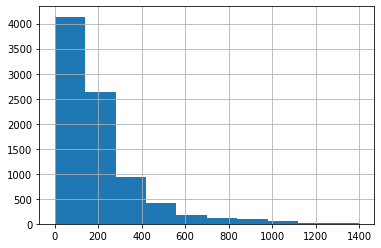

In [98]:
listings_df[listings_df['price'] <= listings_df['price'].quantile(0.99)]['price'].hist();

### Listing Ratings

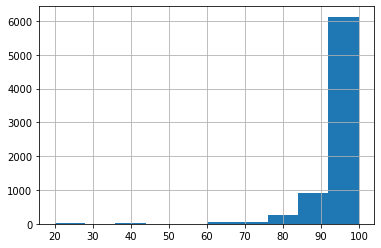

In [77]:
listings_df['review_scores_rating'].hist();

### Average Prices by Neighbourhood

In [112]:
listings_df.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)

neighbourhood_cleansed
La Jolla                       452.718153
Wooded Area                    449.729730
Midtown District               434.280000
Torrey Pines                   426.384615
Rolling Hills Ranch            404.400000
                                  ...    
Tijuana River Valley            60.500000
Kearny Mesa                     59.857143
Nestor                          57.583333
Amphitheater And Water Park     57.500000
Yosemite Dr                     54.750000
Name: price, Length: 102, dtype: float64